# The Multi-Tierr access for measuring Cooking Solution

The MTF approach measures access to modern energy cooking solutions based on six attributes: Cooking Exposure, Cookstove Efficiency, and Safety of Primary Cookstove, Fuel Availability and Affordability.

• **Cooking Exposure**: How is the user's respiratory health affected? This is based on personal exposure to pollutants from cooking activities, which depends on stove emissions, ventilation structure (which includes cooking location and kitchen volume20), and contact time (time spent in the cooking environment).  
• **Cookstove Efficiency**: How much fuel will a person need to use?
• **Convenience**: How long does it take to gather and prepare the fuel and stove before a person can cook?  
• **Safety of Primary Cookstove**: Is it safe to use the stove, or does a person expose himself or herself to possible accidents? This can be based on laboratory testing and the absence of serious accidents in the household. 
• **Affordability**: Can a person afford to pay for both the stove and the fuel?    
• **Fuel Availability**: Is the fuel available when a person needs it?

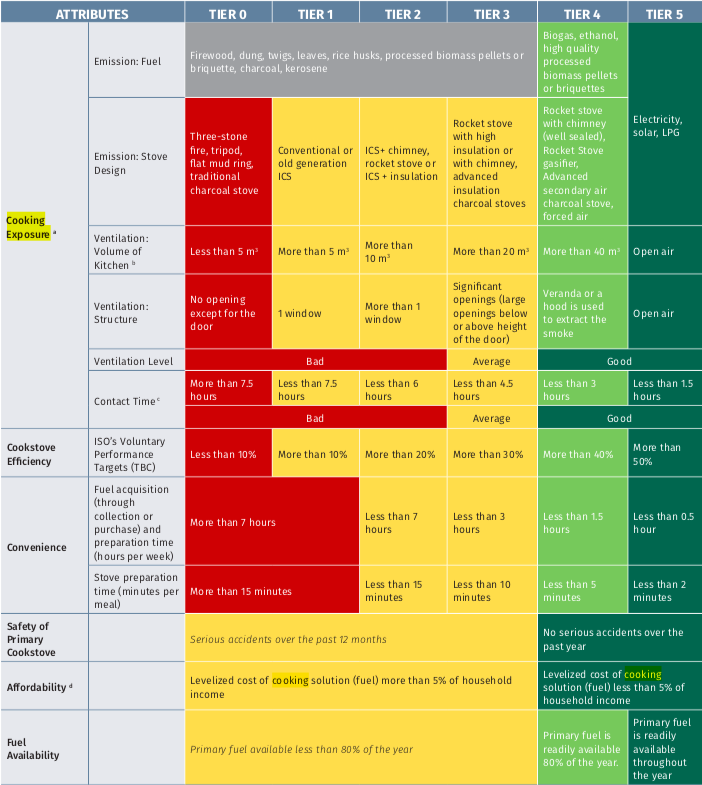

In [15]:
Image('../images/cooking_tier.png')

In [1]:
# Preliminaries
SRC_PATH = '../../src/'
DATA_PATH = '../../Rwanda/raw_data/'


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

from IPython.display import Image
import os,sys

sys.path.insert(0, os.path.normpath(os.path.join(os.path.abspath(''), SRC_PATH)))

from plot_utils import *
from plot_utils import COLOR_SCHEME, TIER_COLORS



# load data
main = pd.read_excel('../../Rwanda/raw_data/main.xlsx')

# important variables
n_households = len(main)
provinces = np.unique(main['Province'])

## Fuel used for cooking

We consider the question: **I.18.In the last 12 months, did any household members die or have permanent limb (bodily injury) damage because of the electricity ?**

Biomass fuel energy from plants and animals: wood, crops, garbage,landfill gax, alcohol fuel, corresponding to:

- Peat - 3
- Charcoal - 4
- Wood - 5
- Animal Waste/Dung - 7
- Crop Residue/ Plant Biomass - 8
- Saw dust - 9
- Biomass briquette - 11
- Processed biomass (pellets)/woodchips - 12
- Ethanol - 13 
- Biogas - 14
- Garbage/plastic - 18

In [2]:
# This question is not available in the main dataset, so I load the I.csv section.
data = main[['Household Identification','habitat']]
data = data.rename(columns = {'Household Identification': 'HHID'})

data_I = pd.read_csv('../../Rwanda/raw_data/csv/I.csv')

data_I = data_I.drop_duplicates(subset=['HHID'])
data_I = pd.merge(data, data_I, on='HHID')

data_I18 = data_I[['HHID','I18A','I18B', 'habitat']].dropna()
data_I18

,HHID,I18A,I18B,habitat
0,1102020811001,5.0,5.0,urban
1,1102020811002,5.0,5.0,urban
3,1102020811004,5.0,5.0,urban
4,1102020811005,5.0,5.0,urban
6,1102020811007,5.0,5.0,urban
...,...,...,...,...
3288,5714040157076,5.0,5.0,rural
3290,5714040157078,5.0,5.0,rural
3292,5714040157082,5.0,19.0,rural
3293,5714040157083,5.0,5.0,rural


In [3]:
indexes = [3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 18]
count = 0
total = len(data_I18)

for i in range(len(indexes)):
    count += len(data_I18[data_I18['I18A'] == indexes[i]])
print("The percentage of household cooking with biomass is of",100*count/total)
   

The percentage of household cooking with biomass is of 99.53703703703704


**Comments:**  
According to the MTF report, this percentage is of 99.6%. Thus, our results are in line with the report.

In [4]:
# Nationwide
counts_nat = []
counts_nat_perc = []

# Rural areas
counts_rur = []
counts_rur_perc = []

# Urban areas
counts_urb = []
counts_urb_perc = []


counts_nat.append(len(data_I18[data_I18['I18A']== 4]))
counts_nat.append(len(data_I18[data_I18['I18A']== 5]))
counts_nat.append(total- sum(counts_nat))
print(counts_nat)
for i in range(len(counts_nat)):
    counts_nat_perc.append(100*counts_nat[i]/total)


data_I18_rur =  data_I18[data_I18['habitat']== 'rural']
total_rur    = len(data_I18_rur)
counts_rur.append(len(data_I18_rur[data_I18_rur['I18A']== 4]))
counts_rur.append(len(data_I18_rur[data_I18_rur['I18A']== 5]))
counts_rur.append(total_rur- sum(counts_rur))
for i in range(len(counts_rur)):
    counts_rur_perc.append(100*counts_rur[i]/total_rur)
print(counts_rur)    


data_I18_urb =  data_I18[data_I18['habitat']== 'urban']
total_urb = len(data_I18_urb)
counts_urb.append(len(data_I18_urb[data_I18_urb['I18A']== 4]))
counts_urb.append(len(data_I18_urb[data_I18_urb['I18A']== 5]))
counts_urb.append(total_urb - sum(counts_urb))
print(counts_urb) 
for i in range(len(counts_urb)):
    counts_urb_perc.append(100*counts_urb[i]/total_urb)

[130, 1353, 29]
[50, 1126, 25]
[78, 221, 4]


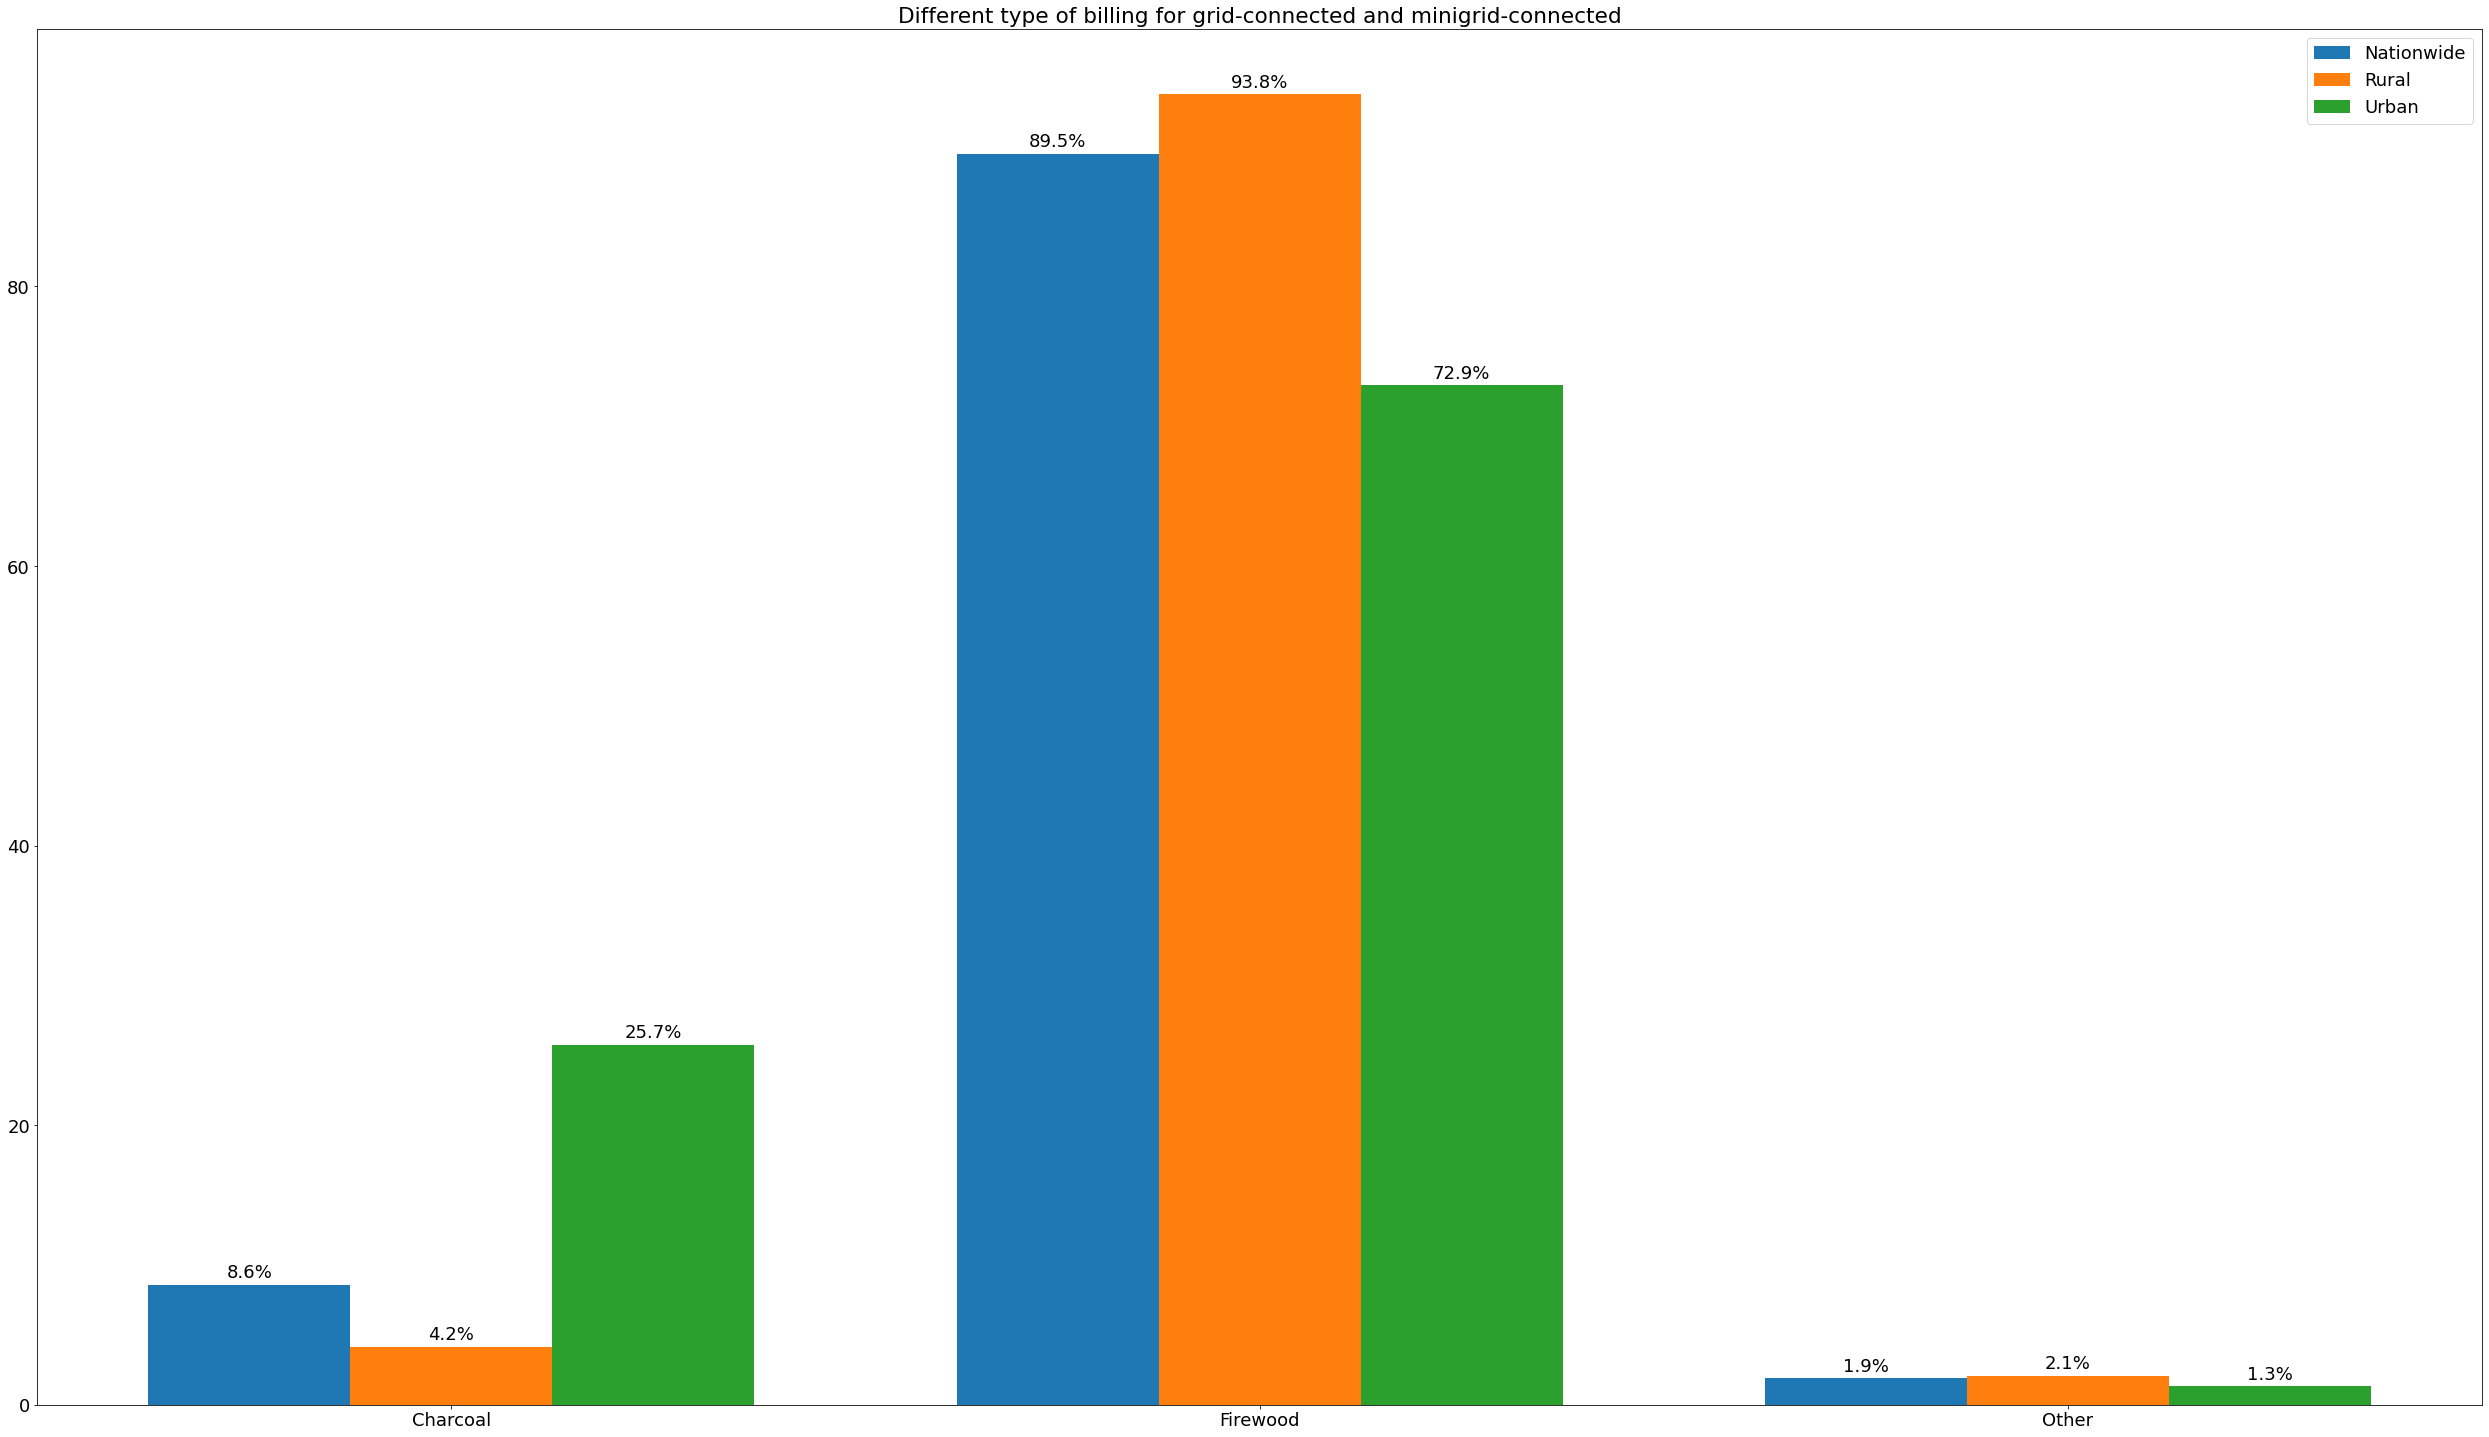

In [5]:
labels = ['Charcoal','Firewood','Other']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig,ax = plt.subplots(figsize=(35,20))
rects1 = ax.bar(x - width, counts_nat_perc, width, label='Nationwide')
rects2 = ax.bar(x, counts_rur_perc, width, label='Rural')
rects3 = ax.bar(x+ width, counts_urb_perc, width, label='Urban')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(round(height,1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.title('Different type of billing for grid-connected and minigrid-connected')
plt.show()


#### Comments

**According to the MTF report**  
Urban households cook predominantly with charcoal (63.4%), followed by firewood (34.1%) while rural households mostly cook with firewood (94.7%)

**Here**  
Urban households with charcoal : 25.7%, Firewood : 72.9%.  
Rural households mostly with firewood: 93.8%


The results are similar for Rural households but not for the urban households.




## Type of stove

We consider the question: 
**I.3: In the last 12 months, which cookstove did your household use for preparing meals?**

In [7]:
# We focus on the hosueholds that are using biomass
data_I_biomass = data_I[data_I['I18A'].isin(indexes)]
data_I3 =  data_I_biomass[['HHID','I3',]].dropna()
data_I3

,HHID,I3
0,1102020811001,1
1,1102020811002,1
3,1102020811004,1
4,1102020811005,1
6,1102020811007,1
...,...,...
3288,5714040157076,1
3290,5714040157078,1
3292,5714040157082,1
3293,5714040157083,1


In [8]:
question_stove_type = 'I3'
stove_types = []
stove_labels = ['Stone/Fire stove','Other Self-built stove','Manufactured stove', 'Other']
for i in range(1,4):
    stove_types.append(len(data_I3[data_I3[question_stove_type]==i]))
stove_types.append(len(data_I3[data_I3[question_stove_type]==555]))
    
total_nat = sum(stove_types)

stove_types_perc = []
for i in range(len(stove_types)):
    stove_types_perc.append(stove_types[i]*100/total_nat)
    
    
print(stove_types_perc)

[100.0, 0.0, 0.0, 0.0]


##### Comments:  
**100%** of the households that are using biomass are using **Stone/Fire stoves**. 

## Injuries while cooking

We consider the question: 
**I.31: In the last 12 months, what type of harm/injury did your household face from this cookstove?**

In [9]:
data_I31 = data_I[['HHID','I31_1','I31_2','I31_3','I31_4','I31_5','I31_6','I31_7','I31_8','habitat']]
data_I31.head(5)

# Accidents correspond to index: 1-2-3-4

,HHID,I31_1,I31_2,I31_3,I31_4,I31_5,I31_6,I31_7,I31_8,habitat
0,1102020811001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,urban
1,1102020811002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,urban
2,1102020811003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,urban
3,1102020811004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,urban
4,1102020811005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,urban


In [10]:
# Nationwide
accident_nat_perc = []
total_nat = len(data_I31)
accident_nat_perc.append(100*(len(data_I31[data_I31['I31_1']== 1]) + len(data_I31[data_I31['I31_2']== 2]) + len(data_I31[data_I31['I31_3']== 3]) + len(data_I31[data_I31['I31_4']== 4]))/total_nat)
accident_nat_perc.append(100 - sum(accident_nat_perc))

# Rural areas
accident_rur_perc = []
data_I31_rur =  data_I31[data_I31['habitat']== 'rural']
total_rur    = len(data_I31_rur)
accident_rur_perc.append(100*(len(data_I31_rur[data_I31_rur['I31_1']== 1]) + len(data_I31_rur[data_I31_rur['I31_2']== 2]) + len(data_I31_rur[data_I31_rur['I31_3']== 3]) + len(data_I31_rur[data_I31_rur['I31_4']== 4]))/total_rur)
accident_rur_perc.append(100 - sum(accident_rur_perc))


# Urban areas
accident_urb_perc = []
data_I31_urb =  data_I31[data_I31['habitat']== 'urban']
total_urb    = len(data_I31_urb)
accident_urb_perc.append(100*(len(data_I31_urb[data_I31_urb['I31_1']== 1]) + len(data_I31_urb[data_I31_urb['I31_2']== 2]) + len(data_I31_urb[data_I31_urb['I31_3']== 3]) + len(data_I31_urb[data_I31_urb['I31_4']== 4]))/total_urb)
accident_urb_perc.append(100 - sum(accident_urb_perc))



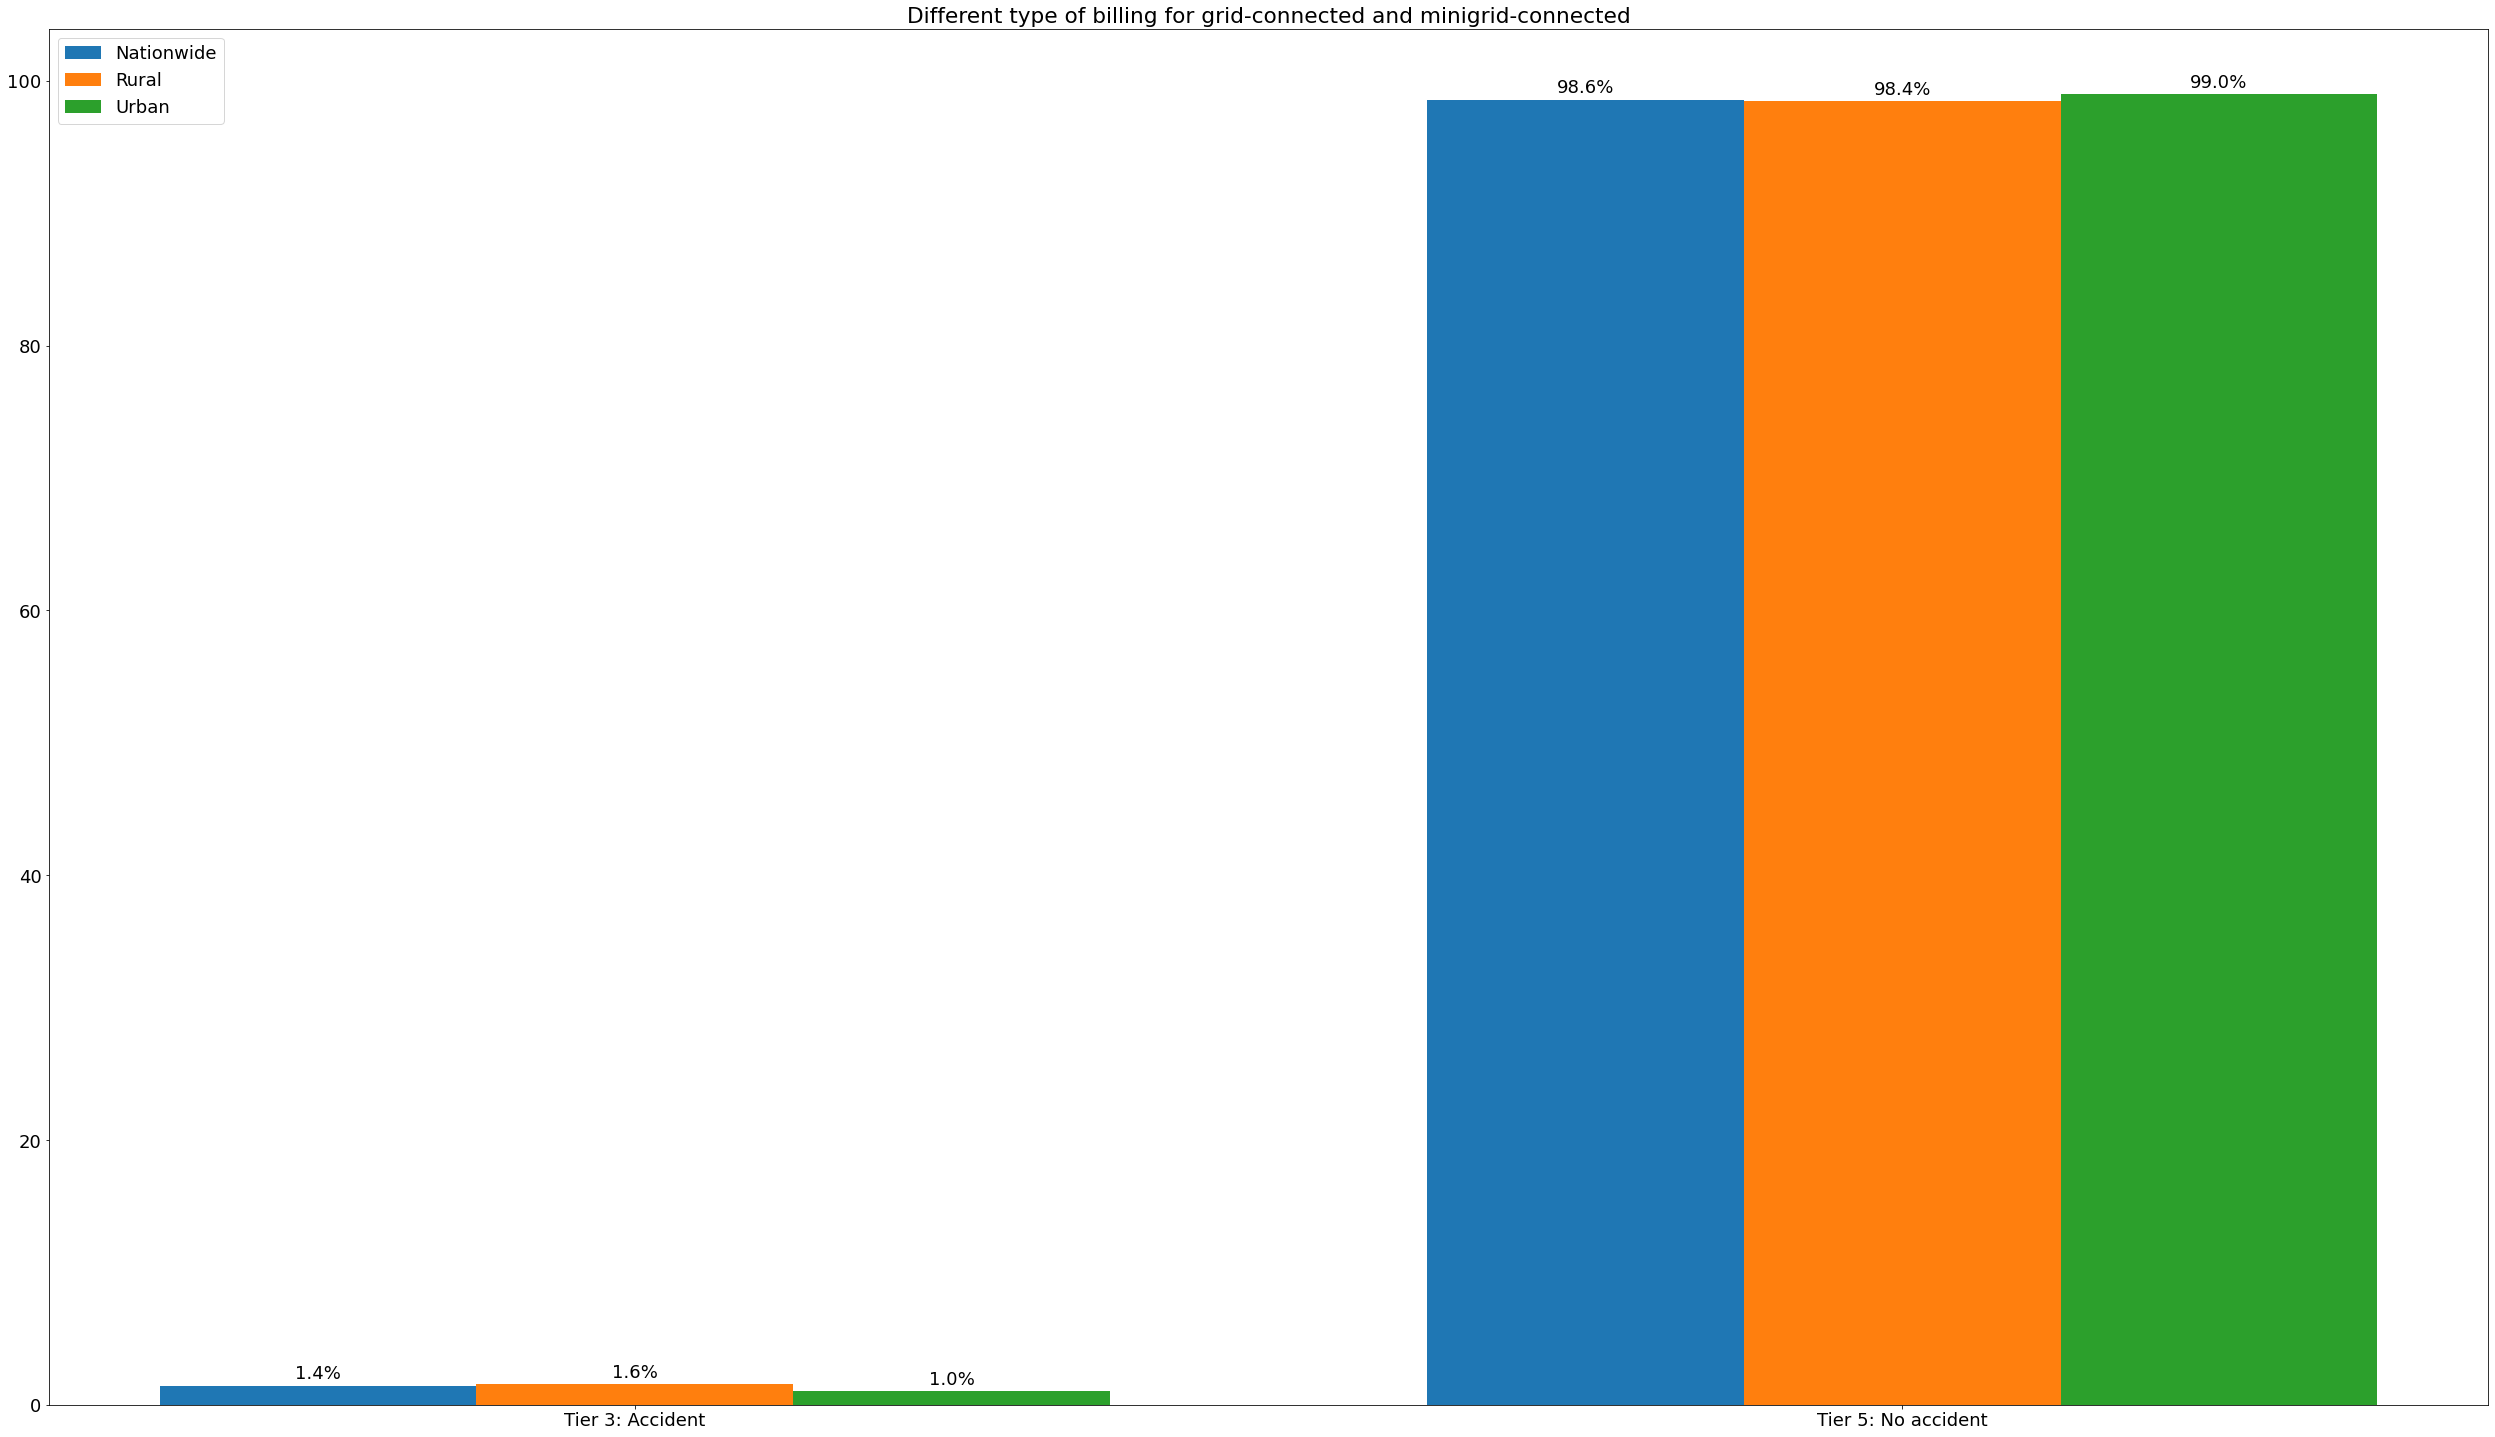

In [17]:
labels = ['Tier 3: Accident','Tier 5: No accident']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig,ax = plt.subplots(figsize=(35,20))
rects1 = ax.bar(x - width, accident_nat_perc, width, label='Nationwide')
rects2 = ax.bar(x, accident_rur_perc, width, label='Rural')
rects3 = ax.bar(x+ width, accident_urb_perc, width, label='Urban')



autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.title('Different type of billing for grid-connected and minigrid-connected')
plt.show()


#### Comments

**In the MTF report**  
The percentage of accident is:
Nationwide:2%
Rural: 2.1%
Urban: 1.2%

**Here**  
The percentage of accident is:
Nationwide:1.4%
Rural: 1.6%
Urban: 1.0%

The results are in line with the MTD report.

## Availability 

We consider the question: 
**I.19: In the last 12 months, how often was the [FUEL TYPE] available?**



In [12]:
data_I19 = data_I[['HHID','I19A', 'habitat']].dropna()
data_I19

,HHID,I19A,habitat
0,1102020811001,2.0,urban
1,1102020811002,2.0,urban
3,1102020811004,2.0,urban
4,1102020811005,3.0,urban
6,1102020811007,1.0,urban
...,...,...,...
3288,5714040157076,2.0,rural
3290,5714040157078,4.0,rural
3292,5714040157082,3.0,rural
3293,5714040157083,1.0,rural


In [13]:
# Nationwide
counts_nat = []
counts_nat_perc = []

# Rural areas
counts_rur = []
counts_rur_perc = []

# Urban areas
counts_urb = []
counts_urb_perc = []


counts_nat.append(len(data_I19[data_I19['I19A']== 1]))
counts_nat.append(len(data_I19[data_I19['I19A']== 2]))
counts_nat.append(len(data_I19[data_I19['I19A']== 3]) +len(data_I19[data_I19['I19A']== 4]) )
print(counts_nat)
for i in range(len(counts_nat)):
    counts_nat_perc.append(100*counts_nat[i]/total)


data_I19_rur =  data_I19[data_I19['habitat']== 'rural']
total_rur    = len(data_I19_rur)
counts_rur.append(len(data_I19_rur[data_I19_rur['I19A']== 1]))
counts_rur.append(len(data_I19_rur[data_I19_rur['I19A']== 2]))
counts_rur.append(len(data_I19_rur[data_I19_rur['I19A']== 3])+len(data_I19_rur[data_I19_rur['I19A'] == 4]))
for i in range(len(counts_rur)):
    counts_rur_perc.append(100*counts_rur[i]/total_rur)
print(counts_rur)    


data_I19_urb =  data_I19[data_I19['habitat']== 'urban']
total_urb = len(data_I19_urb)
counts_urb.append(len(data_I19_urb[data_I19_urb['I19A']== 1]))
counts_urb.append(len(data_I19_urb[data_I19_urb['I19A']== 2]))
counts_urb.append(len(data_I19_urb[data_I19_urb['I19A']== 3]) +len(data_I19_urb[data_I19_urb['I19A']== 4]) )
print(counts_urb) 
for i in range(len(counts_urb)):
    counts_urb_perc.append(100*counts_urb[i]/total_urb)

[345, 589, 578]
[264, 459, 478]
[80, 127, 96]


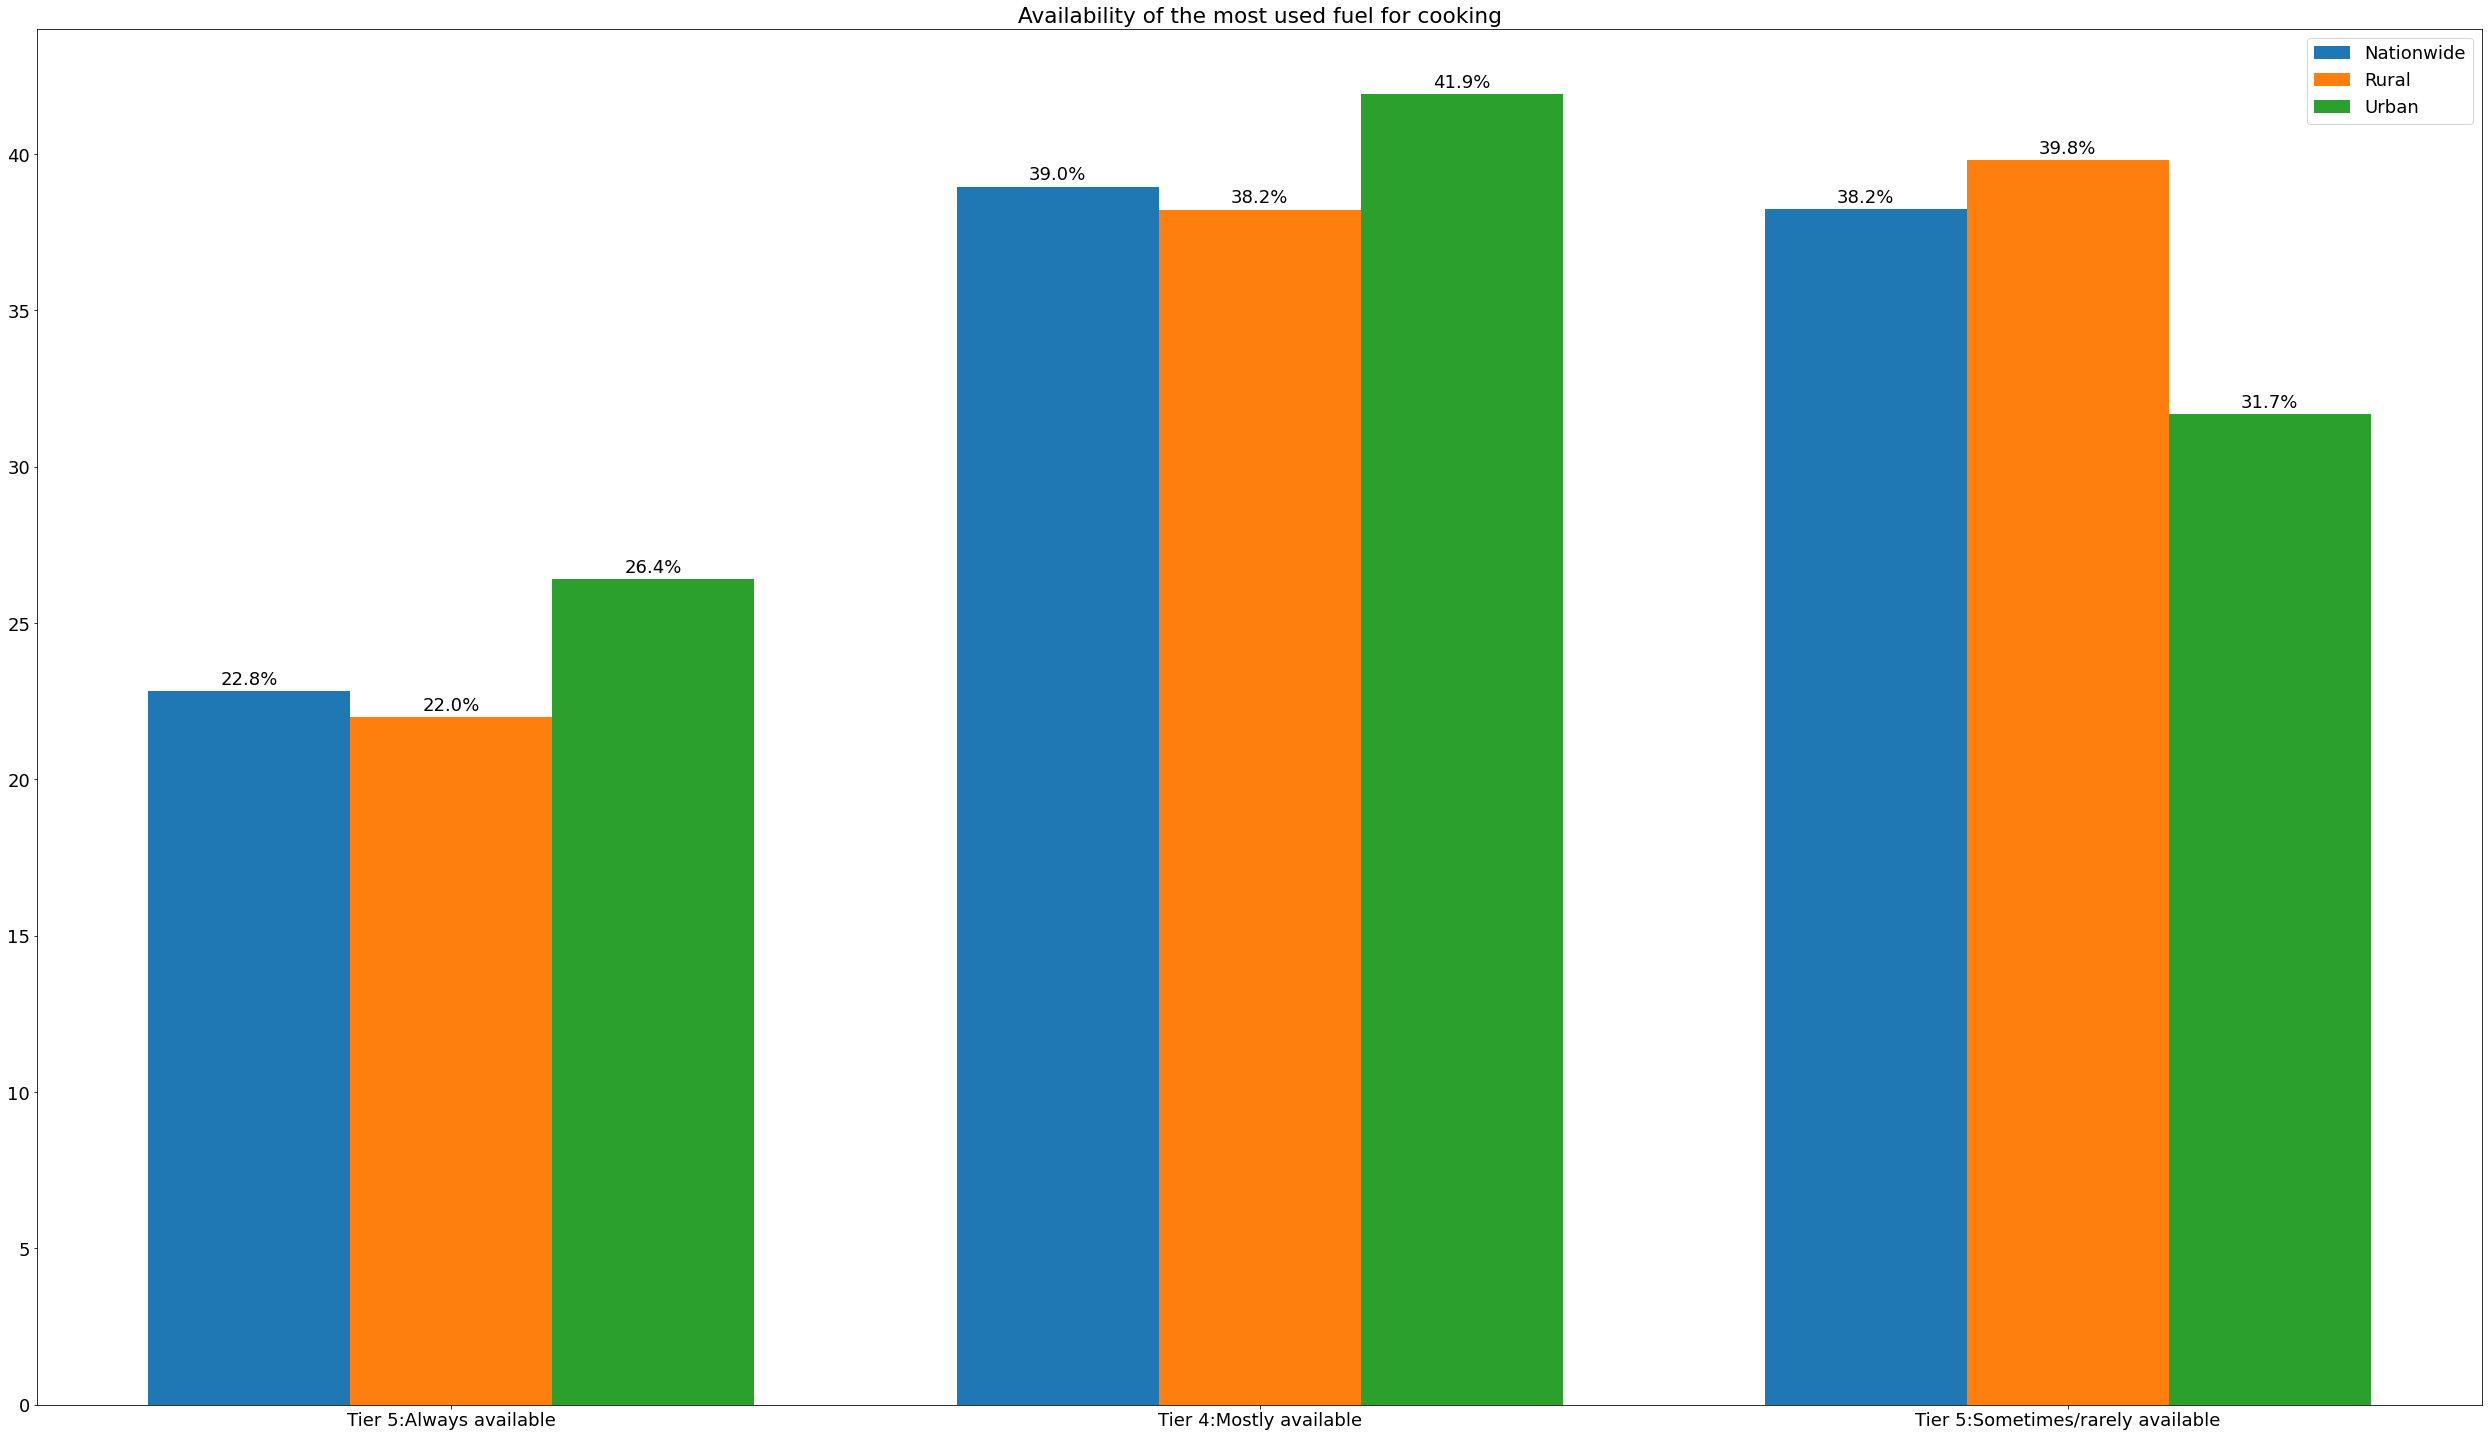

In [16]:
labels = ['Tier 5:Always available','Tier 4:Mostly available','Tier 5:Sometimes/rarely available']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig,ax = plt.subplots(figsize=(35,20))
rects1 = ax.bar(x - width, counts_nat_perc, width, label='Nationwide')
rects2 = ax.bar(x, counts_rur_perc, width, label='Rural')
rects3 = ax.bar(x+ width, counts_urb_perc, width, label='Urban')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.title('Availability of the most used fuel for cooking')
plt.show()


#### Comments: 
**MTF report**
Rarely/Sometimes : 
Urban: 18%
Nationwide:35.5%
Rural: 39.1%

Mostly:
Urban: 50.1%
Nationwide: 40.8%
Rural: 38.8%

Always:
Urban: 31.9%
Nationwide: 23.9%
Rural: 22.1%

**Here**

Rarely/Sometimes : 
Urban: 31.7%
Nationwide:38.2%
Rural: 39.8%

Mostly:
Urban: 41.9%
Nationwide: 39%
Rural: 38.2%

Always:
Urban: 26.4%
Nationwide: 22.8%
Rural: 22.0%


The results are in line with the report.

## Convenience

We consider the question:  
**I.21: How much time do household members spend preparing the cookstove and fuel for each meal on average [including setting up the fuel and turning on the stove but not including gathering fuel or cooking time]?**

Answer in minutes.

In [18]:
data_I21 = data_I[['HHID','I21', 'habitat']].dropna()
data_I21

,HHID,I21,habitat
0,1102020811001,3.0,urban
1,1102020811002,5.0,urban
3,1102020811004,10.0,urban
4,1102020811005,5.0,urban
6,1102020811007,10.0,urban
...,...,...,...
3288,5714040157076,35.0,rural
3290,5714040157078,10.0,rural
3292,5714040157082,30.0,rural
3293,5714040157083,5.0,rural


In [19]:
Cooking_tier = []
convenience_question = 'I21'
for index,row in data_I21.iterrows():  
    if row[convenience_question] >= 15:
        Cooking_tier.append(1)        
    elif row[convenience_question] < 15 and row[convenience_question] >= 10:
        Cooking_tier.append(2)
    elif row[convenience_question] < 10 and row[convenience_question] >= 5:
        Cooking_tier.append(3)  
    elif row[convenience_question] < 5 and row[convenience_question] >= 2:
        Cooking_tier.append(4)  
    elif row[convenience_question] < 2:
        Cooking_tier.append(5)     
    else:
        Cooking_tier.append(np.nan)

        
data_I21['Cookin_Tier'] = Cooking_tier    
        

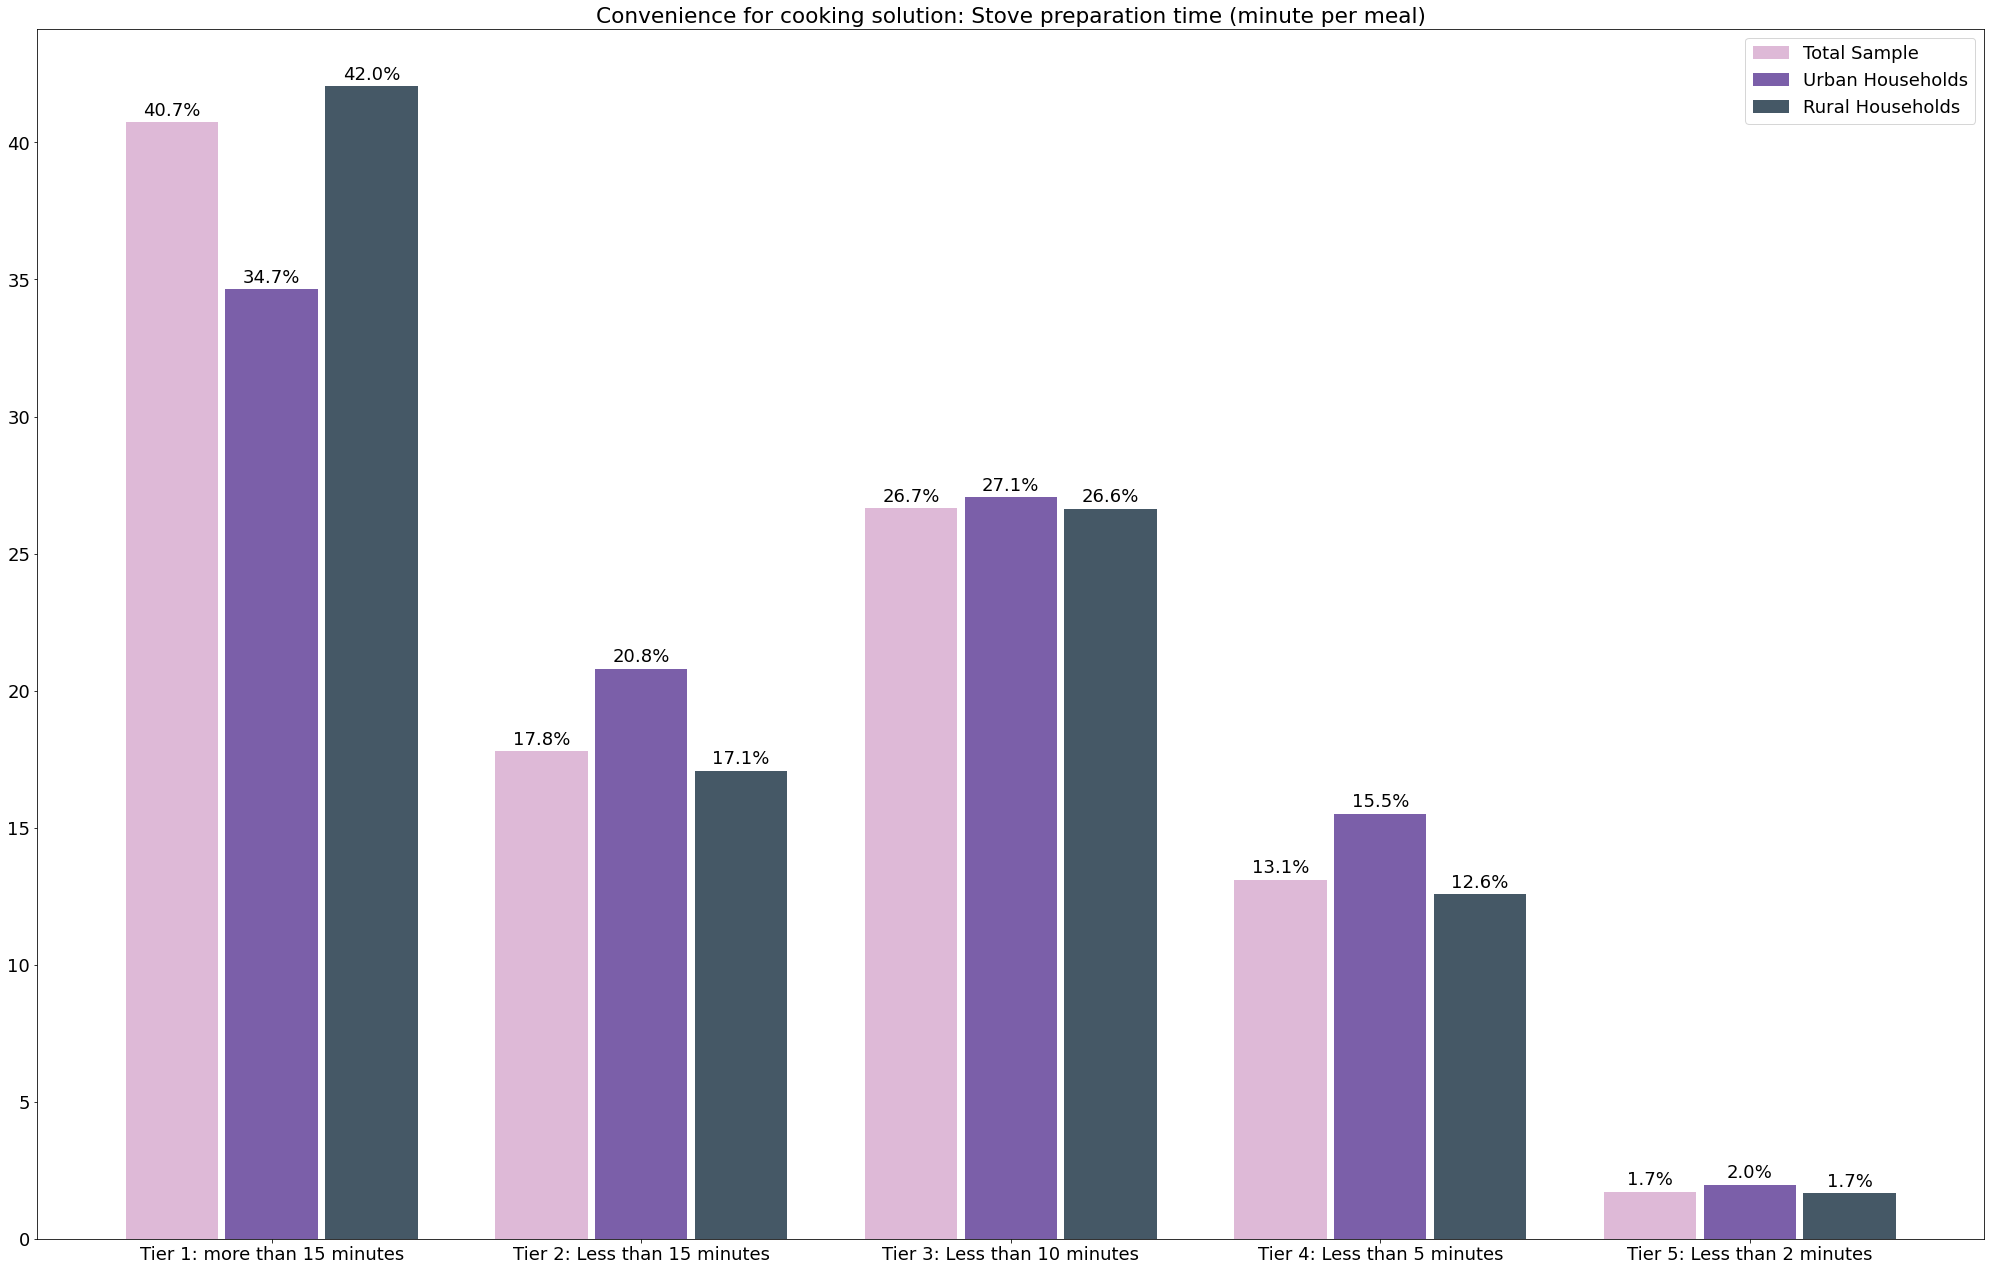

In [20]:
plot_tier_distribution(data_I21,'Cookin_Tier',values=[1,2,3,4,5],
                       labels= ['Tier 1: more than 15 minutes', 'Tier 2: Less than 15 minutes',"Tier 3: Less than 10 minutes", "Tier 4: Less than 5 minutes","Tier 5: Less than 2 minutes"],
                       title='Convenience for cooking solution: Stove preparation time (minute per meal)')
